# Decision Tree 실습_190131
-----
based on ISLR Lab

### Decision Tree
* 강력한 분류기: training accuracy 를 100%로 만들 수 있다.
* Overfitting: Tree 가 충분히 커지면 Training Accuracy 는 100% => test set에서의 낮은 예측력
* Overfitting 의 방지: Tree 가 커지지 못하도록 잘라낸다. ==> prunning
* 계층적 분류기: 먼저 수행된 split 에서 data 가 잘못 split 되면 그 밑으로 error 가 전파되는 특징!

<img src = 'DecisionTree.png'>

In [ ]:
# 시각화 및 분석에 쓸 라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 행과 열 세팅
pd.set_option("max_rows",999)
pd.set_option("max_columns",999)
plt.style.use('seaborn')

## 1. Classification Trees

In [ ]:
# Carseats.csv 불러오기
carseats = 

<변수설명>

- Sales - Unit sales (in thousands) at each location

- CompPrice - Price charged by competitor at each location

- Income - Community income level (in thousands of dollars)

- Advertising - Local advertising budget for company at each location (in thousands of dollars)

- Population - Population size in region (in thousands)

- Price - Price company charges for car seats at each site

- ShelveLoc - A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- Age - Average age of the local population

- Education - Education level at each location

- Urban - A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- US - A factor with levels No and Yes to indicate whether the store is in the US or not

In [ ]:
# 데이터 형태 확인


In [ ]:
# 데이터의 전반적인 정보


In [ ]:
# 데이터의 컬럼별로 null값 개수 확인


In [ ]:
# Sales(numeric)가 8000달러 이상이면 Yes,아니면 No 값을 가지는 High(categorical) 변수 생성
# map: 입력받은 자료형의 각 요소가 함수 f에 의해 수행된 결과를 묶어서 리턴하는 함수
carseats['High'] = (carseats['Sales']>8).map( )

In [ ]:
# 불필요한 변수 삭제
del carseats['Sales']

In [ ]:
# LabelEncoder: Encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# fit_transform: Fit label encoder and return encoded labels
# 범주형 변수: ShelveLoc, Urban, US
carseats['ShelveLoc'] = 
carseats['Urban'] = 
carseats['US'] = 

이 데이터를 이용해서 High 여부(Sales가 높은지 아닌지)를 예측해볼게요!

In [ ]:
# 설명변수, 반응변수 설정
X = carseats.loc[:,   ] # 설명변수 (CompPrice 변수부터 US 변수까지 선택)
y = carseats.loc[:,   ] # 반응변수

# train, test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( , ,test_size= ,random_state= )

In [ ]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

tree_carseats = DecisionTreeClassifier(min_samples_leaf=5, max_depth=6) # 모델 생성 (더 자세한 parameter는 shift+tab)
                                                                        # min_samples_leaf: The minimum number of samples required to be at a leaf node, smoothing 효과
tree_carseats.fit(  ,  ) # 적합하고
y_pred = tree_carseats.predict( ) # 예측한 값들을 y_pred라는 변수명으로 저장

In [ ]:
y_pred[:10] # 예측한 값은 대략 이렇게 생겼어요!

In [ ]:
# score: Returns the mean accuracy on the given data and labels
tree_carseats.score(X_train,y_train), tree_carseats.score(X_test,y_test)   #train과 test set에서의 모델 성능 확인

In [ ]:
# scikitplot 미설치 시 Anaconda prompt에서 pip install scikit-plot 실행
# https://scikit-plot.readthedocs.io/en/stable/Quickstart.html 참고
# plot_feature_importances: plot feature importances of a tree-based sklearn estimator
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(   ,feature_names=X.columns,x_tick_rotation=45)

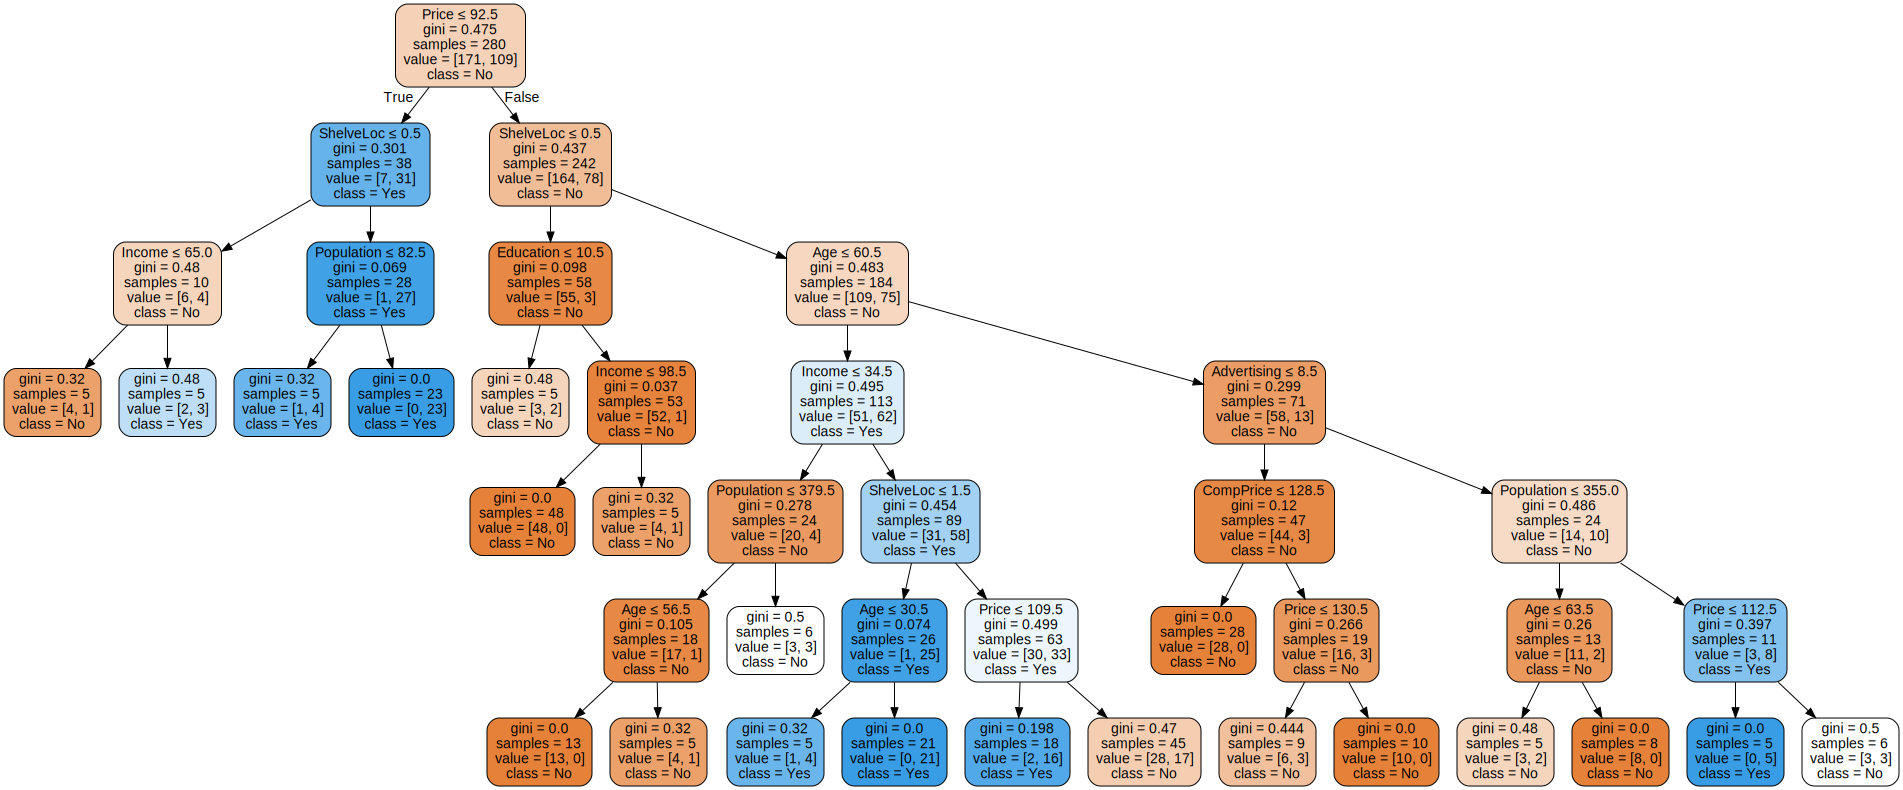

In [18]:
## graphviz 설치는 이번 실습에서 생략합니다!
## 아래 링크를 참고해서 설치해보세요(*환경변수 PATH에 graphviz의 경로를 추가해 주어야 합니다)
## https://graphviz.gitlab.io/download/
## http://jalbum.com/board_fasH18/25459 (Windows)
## http://macappstore.org/graphviz-2/ (Mac)


# from graphviz import Source
# from sklearn.tree import export_graphviz # export_graphviz: Export a decision tree in DOT(텍스트로 표현한 그래프 표현언어) format

# tree_carseats_graph = export_graphviz(tree_carseats,
#                                      out_file=None,
#                                      feature_names=X.columns,
#                                      class_names=tree_carseats.classes_,
#                                      filled=True,
#                                      rounded=True,
#                                      special_characters=True)
# Source(tree_carseats_graph)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report( , ))

In [ ]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix( , )

## 2. Regression Trees

In [ ]:
# Boston.csv 불러오기
boston =                # index_col: index로 삼을 열을 설정

<변수설명>
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- BLACK - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [ ]:
# 설명변수, 반응변수 설정
X = boston.loc[:,   ]  
y = boston.loc[:,   ]

# train, test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split( , ,test_size= ,random_state= )

In [ ]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

tree_boston = DecisionTreeRegressor(min_samples_leaf=  , max_depth=  ) #모델 생성
tree_boston.fit( , ) # 적합하고
y_pred = tree_boston.predict(  ) # 예측값들을 y_pred에 저장

In [ ]:
tree_boston.score( , ), tree_boston.score( , ) #train과 test set에서의 모델 성능 확인

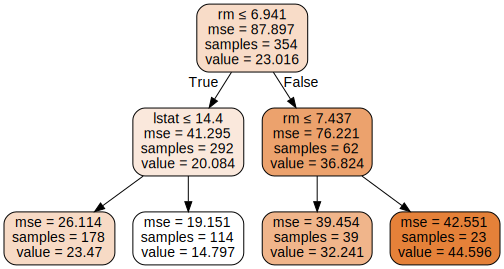

In [26]:
## 트리 그래프 그리기
# tree_boston_graph = export_graphviz(tree_boston, 
#                                     out_file=None, 
#                                     feature_names=X.columns,
#                                     filled=True, 
#                                     rounded=True,  
#                                     special_characters=True)

# Source(tree_boston_graph)

&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

# RandomForest 실습_190131
---
based on 12기 김지혁님 강의자료

### RandomForest
- 임의성(randomness)을 관측치(observation)뿐만 아니라 변수(feature, variable)에도 적용 => 차원축소 효과
- 다양성을 극대화 하여 예측력이 상당히 우수한 편이고 다수의 트리의 예측 결과를 종합하여 의사결정을 진행하기 때문에 안정   성도 상당히 높다는 장점  
- 다수의 트리를 이용한 의사결정 기법을 이용하기 때문에 기존의 트리가 갖는 장점 중 하나인 설명력을 잃게 된다는 단점

# Data

In [ ]:
# titanic 데이터 불러오기
# index로 사용할 열을 PassengerId로 설정
titanic = 

<변수설명>
- survived: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target
- pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name: A field rich in information as it contains title and family names
- sex: male/female
- age: Age (a significant portion of values are missing)
- sibsp: Number of siblings/spouses aboard
- parch: Number of parents/children aboard
- ticket: Ticket number
- fare: Passenger fare (British Pound)
- cabin: Does the location of the cabin influence chances of survival?
- embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

<table>
    <thead>
        <tr>
            <th>변수</th>
            <th>정의</th>
            <th>key</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>survived</td>
            <td>생존여부</td>
            <td>0 = No, 1 = Yes</td>
        </tr>
        <tr>
            <td>pclass</td>
            <td>승객 클래스</td>
            <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
        </tr>
        <tr>
            <td>sex	</td>
            <td>성별</td>
            <td>male, female</td>
        </tr>
        <tr>
            <td>Age</td>
            <td>나이</td>
            <td></td>
        </tr>
        <tr>
            <td>sibsp</td>
            <td>같이 승선한 형재자매 혹은 배우자 수</td>
            <td></td>
        </tr>
        <tr>
            <td>parch</td>
            <td>같이 승선한 부모 혹은 자녀 수</td>
            <td></td>
        </tr>
        <tr>
            <td>Ticket</td>
            <td>티켓 번호</td>
            <td></td>
        </tr>
        <tr>
            <td>fare</td>
            <td>요금</td>
            <td></td>
        </tr>
        <tr>
            <td>cabin</td>
            <td>구역 번호</td>
            <td></td>
        <tr>
            <td>embarked</td>
            <td>고객이 승선한 항구</td>
            <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
        </tr>
    </tbody>
</table>

In [ ]:
# 불필요한 변수 삭제
del titanic['Ticket']
del titanic['Name']

데이터 길이와 null값 여부를 체크해봅시다!

In [ ]:
# 데이터의 형태 확인


In [ ]:
# 데이터의 전반적인 정보


In [ ]:
# 데이터의 null값 확인


Age와 Cabin 그리고 Embarked에서 null값이 발견되었습니다. 심지어 Cabin은 null값이 무려 687개입니다!<br>
데이터의 길이가 891개임을 감안할 때, 이용하기 매우 어려운 컬럼으로 보입니다<br>
Null 값이 있는 Column 은 제거해줍시다

In [ ]:
#  null값이 많은 컬럼 제거
del titanic["Cabin"]
del titanic["Age"]

In [ ]:
# ‘any’ : If any NA values are present, drop that row or column
titanic = 

### 0. Histogram

In [ ]:
# histogram 그리기
titanic.hist(bins = 50, figsize = (15,12))

### 1-1. Integer - Float : barchart (doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html)

In [ ]:
# Parch로 groupby하여 Survived의 mean을 bargraph로 표현
stat = 
plt.bar(x=, height=)
plt.xlabel('Parch')
plt.ylabel('Survived Ratio')

### 1-2. Category - Float : barchart

In [ ]:
# Sex로 groupby하여 Survived의 mean을 bargraph로 표현
stat = 
plt.bar(x= , height= )

### 2. Category - Float : box plot (doc https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [ ]:
# boxplot으로 표현
sns.boxplot(x='Pclass', y='Fare', data=titanic) 

In [ ]:
sns.boxplot(x=, y=, data=)

In [ ]:
# lmplot: visualize a linear relationship
#         draw a scatterplot of two variables x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression
sns.lmplot(x='Fare',y='Survived', data=titanic)

# 1) Classification : 승객은 살았는가 죽었는가?

## 0.Dummify(더미화)

In [ ]:
titanic.info()

In [ ]:
# pd.get_dummies( "categorical data" )


In [ ]:
# Sex와 Embarked의 더미변수를 생성한 뒤 titanic data에 이어붙이기
dummy_sex = 
dummy_embarked = 

titanic_dummy = 

# 더미변수를 생성했으므로 기존의 categorical 변수 삭제
del titanic_dummy['Sex']
del titanic_dummy['Embarked']

## 1. Split Data into Train and Test Data

In [ ]:
# 이렇게 해두면 이용할 컬럼을 선택할 때 편해요!
titanic_dummy.columns

In [ ]:
# 이용할 컬럼 선택
features = ['Pclass', 'SibSp', 'Parch', 'Fare','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
# 타겟컬럼과 아닌 컬럼들을 분리
X = titanic_dummy[ ]
y = titanic_dummy[ ]

# train, test set으로 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 10)

## 2.Build the RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 생성
rfc_titanic = RandomForestClassifier(n_estimators = 500, # The number of trees in the forest
                            min_samples_leaf = 2,  # A smaller leaf makes the model more prone to capturing noise in train data
                            max_depth = 3,
                            max_features = 'auto') # auto: sqrt(n_features)

## 3.Train the Model

In [ ]:
# 모델 학습
rfc_titanic.

## 4.Predict the result

In [ ]:
# Survived 여부를 예측
rfc_titanic.

In [ ]:
# Survived or Dead 에 대한 예측 확률을 보여줌
# predict_proba: 분류기가 각 샘플에 부여한 클래스별 확률 확인가능
pd.DataFrame(rfc_titanic. , columns = ["Dead","Survived"]).head()

## 5. Validate the result

In [ ]:
# score :  mean accuarcy
rfc_titanic.   # test set으로 RandomForestClassifier의 성능 평가

## 6. Confusion Matrix

In [ ]:
# 예측 결과를 y_pred 이라는 변수명으로 저장
y_pred = rfc_titanic.

In [ ]:
# Create confusion matrix
pd.crosstab(, , rownames = ["Actual"], colnames =["Prediction"] )

## 7. Feature Importance

In [ ]:
# feature importance
from scikitplot.estimators import plot_feature_importances

plot_feature_importances(  , feature_names=X.columns, x_tick_rotation=45)

# 2) Regression - 요금을 예측해봅시다!

이번에는 Regression 모델을 이용하여 승객의 **요금(Fare)**을 예측해보도록 하겠습니다
- 더미화된 데이터까지는 과정이 동일하니 더미화된 데이터를 다시 불러옵니다

In [ ]:
titanic_dummy.head()

- 예측에 사용할 변수와 예측할 변수(target)를 다시 설정해 줍니다

## 1. Split Data into Train and Test Data

In [ ]:
# 이렇게 해두면 이용할 컬럼을 선택할 때 편해요!
titanic_dummy.columns

In [ ]:
# 이용할 컬럼 선택
features = ['Pclass', 'SibSp', 'Parch', 'Survived','Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

In [ ]:
# 설명변수와 반응변수 설정
X = titanic_dummy[ ] 
y = titanic_dummy[ ]

# Train, test set으로 나누기
X_train, X_test, y_train, y_test =  

## 2.Build the RandomForestRegressor

In [ ]:
# 모델 생성
from sklearn.ensemble import RandomForestRegressor

rfr_titanic = RandomForestRegressor(
                            n_estimators = , 
                            min_samples_leaf = , 
                            max_depth = , 
                            max_features = , # maximum number of features Random Forest is allowed to try in individual tree
                            )

## 3.Train the Model

In [ ]:
# 모델 학습
rfr_titanic.

## 4.Predict the result

In [ ]:
# X_test set으로 y 예측
rfr_titanic.

## 5. Validate the result

In [ ]:
# 얼마나 잘 예측했는지 확인
rfr_titanic.  # test set으로 RandomForestRegressor의 성능 평가

## 6. Feature Importance

In [ ]:
# feature importance
plot_feature_importances(, feature_names=, x_tick_rotation=)

&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

# Boosting 실습_190131
---
based on 9기 박성남님 강의자료

### Boosting
- Bagging의 변형으로,모델이 잘 예측하지 못하는 부분을 개선하기 위한 방법
- 이전 모델의 오류를 고려하는 연속 앙상블 기법
- 이전 모델이 예측하지 못한 Error 데이터에 가중치를 부여하여 다음 모델이 더 잘 예측하도록 함
- bias 감소


In [ ]:
# Boston 데이터를 사용할 것이므로 train,test set 재설정
# 설명변수, 반응변수 설정
X = boston.loc[:,'crim':'lstat' ]  
y = boston.loc[:, 'medv'  ]

# train, test set으로 나누기
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3 ,random_state=42 )

## 1. GradientBoosting

#### Step 1 :  Parameter를 적당한 값으로 고정

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbm_boston = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,   # 모델 생성
                                     max_depth=4,random_state=42)
gbm_boston   # 적합하고
y_pred =   # 예측한 값을 y_pred에 저장

In [ ]:
from sklearn.model_selection import cross_val_score

print("Score : {}".format(np.mean(cross_val_score(gbm_boston, X_train, y_train, cv=5)))) # cross validation score의 평균

In [ ]:
# feature importance
plot_feature_importances(gbm_boston, feature_names=X.columns, x_tick_rotation=45)

#### Step 2 : Boosting Parameters 최적화

In [ ]:
# GridSearchCV를 진행할 파라미터 조합
gbm_params_1 = {
    'min_samples_split' : [int(n*p*0.01) for p in range(2,8,2) for n in [len(X_train)]], # The minimum number of samples required to split an internal node
    'min_samples_leaf' : [3,5,10], # The minimum number of samples required to be at a leaf node
    'max_depth' : [5,7],
    'max_features' : ['sqrt'],
    'subsample' : [0.5, 0.8], # The fraction of samples to be used for fitting the individual base learners
}

In [ ]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

gbm_boston_grid1 = GridSearchCV(   , param_grid=, cv=, verbose= ) # verbose: Controls the verbosity(자세한 정도)-the higher, the more messages
gbm_boston_grid1.fit(X_train, y_train)

In [ ]:
print("Best Score : {}".format(gbm_boston_grid1.  ))
print("Best Params : {}".format(gbm_boston_grid1.  ))

In [ ]:
best_gbm_model = gbm_boston_grid1.       # 주어진 parameter의 조합으로 생성된 최적 모델

####  Step 3 : 다시 최적의 Core Parameter 찾기

In [ ]:
gbm_params_2 = {
    'learning_rate' : [0.01, 0.05, 0.07, 0.1, 0.2],
    'n_estimators' : [n for n in range(80,200,20)]
}
gbm_boston_grid2 = GridSearchCV(    , param_grid=  , cv=5, verbose=1)
gbm_boston_grid2.fit(X_train, y_train)

In [ ]:
print("Best Score : {}".format(gbm_boston_grid2.best_score_))
print("Best Params : {}".format(gbm_boston_grid2.best_params_))

In [ ]:
best_gbm_model = gbm_boston_grid2.best_estimator_   # 주어진 parameter의 조합으로 생성된 최적 모델

In [ ]:
print("Score : {}".format(np.mean(cross_val_score(best_gbm_model, X_train, y_train, cv=5))))

## 2. AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

####  Step 1 : Core Parameters 바로 최적화

In [ ]:
# AdaBoost의 parameter 조합
ada_params = {
    'learning_rate' : [   ],
    'n_estimators' :  [   ]
}

In [ ]:
# GridSearchCV
ada_boston_grid = GridSearchCV(AdaBoostRegressor(), param_grid= , cv= , verbose= )
ada_boston_grid.fit(X_train, y_train)

In [ ]:
# best score와 best params 출력
print("Best Score : {}".format(ada_boston_grid.  ))
print("Best Params : {}".format(ada_boston_grid.  ))

In [ ]:
best_ada_model = ada_boston_grid.        # 주어진 parameter의 조합으로 생성된 최적 모델

## Model selection

In [ ]:
models_score = []
for grid in [gbm_boston_grid2, ada_boston_grid]:
    models_score.append([grid.best_estimator_.__class__.__name__, grid.best_score_])
models_score = pd.DataFrame(models_score, columns = ['model', 'score'])

In [ ]:
sns.barplot(x='', y='', data=   )

- catboost/xgboost 등등 다양한 boosting 모델이 있으니 참고해서 실습해보세요:)

In [ ]:
## Models for Classification
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
# from lightgbm import LGBMClassifier

## Models for Regression
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
# from lightgbm import LGBMClassifier, LGBMRegressor